<a href="https://colab.research.google.com/github/spatidar2109/ML_Learing/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

milk = pd.read_csv("/content/milk (1).csv",index_col=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
milkscaled=scaler.fit_transform(milk)

milkscaled = pd.DataFrame(milkscaled,columns=milk.columns)

In [2]:
milk.head()

,water,protein,fat,lactose,ash
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [3]:
milkscaled.head()

,water,protein,fat,lactose,ash
0,0.948806,-1.009291,-0.903208,1.542217,-1.037554
1,0.821407,-1.344603,-0.660619,1.040773,-1.259945
2,0.813445,-1.121062,-0.738247,1.263637,-1.381249
3,0.964731,-1.260775,-0.864394,1.152205,-0.936467
4,0.972694,-1.568145,-0.563583,0.149319,-1.542988


In [4]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(milkscaled,method='average')




In [6]:
mergings

array([[20.        , 21.        ,  0.14557691,  2.        ],
       [10.        , 15.        ,  0.30903062,  2.        ],
       [ 1.        ,  2.        ,  0.34704952,  2.        ],
       [ 6.        , 11.        ,  0.35975407,  2.        ],
       [ 5.        , 14.        ,  0.36090936,  2.        ],
       [ 7.        , 26.        ,  0.36925133,  3.        ],
       [ 3.        , 12.        ,  0.42572471,  2.        ],
       [27.        , 31.        ,  0.5853266 ,  4.        ],
       [28.        , 29.        ,  0.59940787,  4.        ],
       [16.        , 19.        ,  0.61176231,  2.        ],
       [ 0.        , 32.        ,  0.62923999,  5.        ],
       [ 8.        , 13.        ,  0.78713165,  2.        ],
       [22.        , 25.        ,  0.83150788,  3.        ],
       [30.        , 33.        ,  0.97124069,  7.        ],
       [23.        , 24.        ,  1.10551437,  2.        ],
       [ 9.        , 36.        ,  1.20249687,  3.        ],
       [ 4.        , 35.

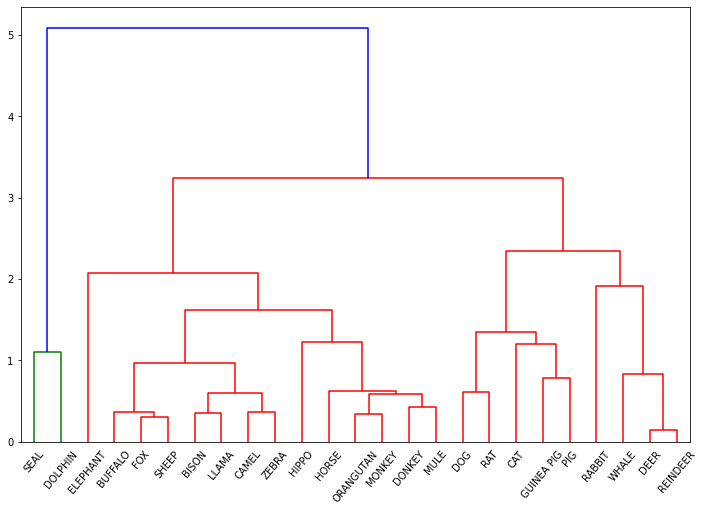

In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=np.array(milk.index),
           leaf_rotation=50,
           leaf_font_size=10,
)

plt.show()

In [ ]:
##K Means ####################################

In [8]:
import pandas as pd
import numpy as np

milk = pd.read_csv("/content/milk (1).csv",
                   index_col=0)

from sklearn.preprocessing import StandardScaler
# Create scaler: scaler
scaler = StandardScaler()
milkscaled=scaler.fit_transform(milk)

milkscaled = pd.DataFrame(milkscaled,columns=milk.columns)

# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with clusters: model
model = KMeans(n_clusters=3,random_state=2019)

# Fit model to points
model.fit(milkscaled)
#model.n_init
# Determine the cluster labels of new_points: labels
labels = model.predict(milkscaled)

# Print cluster labels of new_points
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 2 2]


In [10]:
milk.shape, milkscaled.shape

((25, 5), (25, 5))

In [12]:
labels.shape

(25,)

In [13]:
clusterID = pd.DataFrame({'ClustID':labels},index=milk.index)
clusteredData = pd.concat([milk,clusterID],
                          axis='columns')

In [16]:
clusterID

,ClustID
HORSE,1
ORANGUTAN,1
MONKEY,1
DONKEY,1
HIPPO,1
CAMEL,1
BISON,1
BUFFALO,1
GUINEA PIG,1
CAT,1


In [15]:
milk.head()

,water,protein,fat,lactose,ash
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [17]:
print(model.inertia_)

30.822631131428075


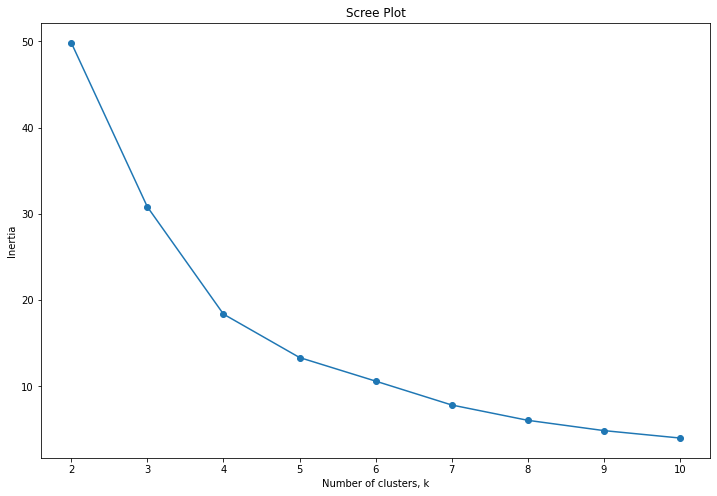

In [18]:
clustNos = [2,3,4,5,6,7,8,9,10]
Inertia = []

for i in clustNos :
    model = KMeans(n_clusters=i,random_state=2019)
    model.fit(milkscaled)
    Inertia.append(model.inertia_)
    
# Import pyplot
import matplotlib.pyplot as plt

plt.plot(clustNos, Inertia, '-o')
plt.title("Scree Plot")
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(clustNos)
plt.show()

In [19]:
# Create a KMeans instance with clusters: Best k model
model = KMeans(n_clusters=4)

# Fit model to points
model.fit(milkscaled)

KMeans(n_clusters=4)

In [20]:
# Determine the cluster labels of new_points: labels
labels = model.predict(milkscaled)

clusterID = pd.DataFrame(labels)
clusteredData = pd.concat([milk.reset_index(drop=True),clusterID],axis=1)

In [22]:
clusteredData.head()

,water,protein,fat,lactose,ash,0
0,90.1,2.6,1.0,6.9,0.35,2
1,88.5,1.4,3.5,6.0,0.24,2
2,88.4,2.2,2.7,6.4,0.18,2
3,90.3,1.7,1.4,6.2,0.40,2
4,90.4,0.6,4.5,4.4,0.10,2


In [23]:
## Using Pipeline
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

# Fit the pipeline to samples
pipeline.fit(milkscaled)

# Calculate the cluster labels: labels
labels = pipeline.predict(milkscaled)

# Display ct
print(labels)

[1 1 1 1 1 1 1 3 3 3 3 1 1 3 1 3 3 3 0 0 0 0 0 2 2]
